In [9]:
data_list = "/home/seasoning/lane/datasets/VIL100/data/train.txt"

with open(data_list, "r") as f:
    img_infos = [
        img_name.strip()[1:] for img_name in f.readlines()
    ]
annotations = [
    img_path.replace("JPEGImages", "Json") + ".json" for img_path in img_infos
]
mask_paths = [
    img_path[:-3].replace("JPEGImages", "Annotations") + "png" for img_path in img_infos
]

print(len(img_infos), len(annotations), len(mask_paths))
print(img_infos[0:3])
print(annotations[0:3])
print(mask_paths[0:3])

from pathlib import Path
# help(Path)
test_pred_anno = Path("tmp").joinpath(img_infos[0].replace("JPEGImages", "Json").replace(".jpg", ".jpg.json"))
print(test_pred_anno)

8000 8000 8000
['JPEGImages/0_Road001_Trim003_frames/00246.jpg', 'JPEGImages/0_Road001_Trim003_frames/00075.jpg', 'JPEGImages/0_Road001_Trim003_frames/00078.jpg']
['Json/0_Road001_Trim003_frames/00246.jpg.json', 'Json/0_Road001_Trim003_frames/00075.jpg.json', 'Json/0_Road001_Trim003_frames/00078.jpg.json']
['Annotations/0_Road001_Trim003_frames/00246.png', 'Annotations/0_Road001_Trim003_frames/00075.png', 'Annotations/0_Road001_Trim003_frames/00078.png']
tmp/Json/0_Road001_Trim003_frames/00246.jpg.json


In [10]:
anno_dir = "/home/seasoning/lane/datasets/culane/driver_23_30frame/05151640_0419.MP4/00000.lines.txt"
shapes = []
with open(anno_dir, "r") as anno_f:
    lines = anno_f.readlines()
    for line in lines:
        coords = []
        coords_str = line.strip().split(" ")
        for i in range(len(coords_str) // 2):
            coord_x = float(coords_str[2 * i])
            coord_y = float(coords_str[2 * i + 1])
            coords.append(coord_x)
            coords.append(coord_y)
        if len(coords) > 3:
            shapes.append(coords)
print(shapes)

[[240.573, 590.0, 257.848, 580.0, 275.127, 570.0, 292.409, 560.0, 309.699, 550.0, 327.126, 540.0, 344.433, 530.0, 361.753, 520.0, 379.085, 510.0, 396.56, 500.0, 413.925, 490.0, 431.309, 480.0, 448.714, 470.0, 467.012, 460.0, 484.586, 450.0, 502.935, 440.0, 520.431, 430.0, 538.821, 420.0, 557.229, 410.0, 575.653, 400.0, 593.868, 390.0, 612.315, 380.0, 630.77, 370.0, 649.232, 360.0, 667.698, 350.0, 686.165, 340.0, 704.416, 330.0, 722.879, 320.0, 741.337, 310.0, 759.788, 300.0, 778.228, 290.0], [1146.04, 590.0, 1133.33, 580.0, 1120.99, 570.0, 1108.67, 560.0, 1097.02, 550.0, 1084.72, 540.0, 1073.22, 530.0, 1060.98, 520.0, 1049.07, 510.0, 1037.67, 500.0, 1025.92, 490.0, 1014.6, 480.0, 1003.34, 470.0, 992.112, 460.0, 980.928, 450.0, 969.781, 440.0, 958.669, 430.0, 947.589, 420.0, 936.959, 410.0, 925.929, 400.0, 914.917, 390.0, 904.651, 380.0, 893.66, 370.0, 882.768, 360.0, 871.781, 350.0, 861.521, 340.0, 850.519, 330.0, 839.503, 320.0, 828.468, 310.0, 818.147, 300.0, 807.161, 290.0], [1660.4

In [11]:
import json
anno_dir = "/home/seasoning/lane/datasets/VIL100/Json/0_Road001_Trim003_frames/00000.jpg.json"
with open(anno_dir, "r") as anno_f:
    lanes = [
                lane["points"] for lane in json.load(anno_f)["annotations"]["lane"]
            ]
print(lanes)
print(len(lanes))
lanes = [[[point[0], point[1] - 1] for point in lane] for lane in lanes]
lanes = [[item for point in lane for item in point] for lane in lanes]
print(lanes)
# lanes_1 = [[item for point in lane for item in [point[0], point[1] - 1]] for lane in lanes]
# print(lanes_1)  



[[[1920, 729.4], [1906.1, 723.7], [1892.2, 718.1], [1878.3, 712.4], [1864.4, 706.8], [1850.5, 701.1], [1836.6, 695.4], [1822.8, 689.8], [1808.9, 684.1], [1795, 678.5], [1781.1, 672.8], [1767.2, 667.2], [1753.3, 661.5], [1739.4, 655.8], [1725.5, 650.2], [1711.6, 644.5], [1697.7, 638.9], [1683.8, 633.2], [1669.9, 627.6], [1656, 621.9], [1642.2, 616.3], [1628.3, 610.6], [1614.1, 605.7], [1599.9, 600.8], [1585.7, 595.9], [1571.5, 591], [1557.4, 586.2], [1543.2, 581.3], [1529, 576.4], [1514.8, 571.5], [1500.6, 566.6], [1486.4, 561.7], [1472.3, 556.8], [1458.1, 551.9], [1443.9, 547], [1429.7, 542.2], [1415.5, 537.3], [1401.4, 532.4], [1387.2, 527.5], [1373, 522.6], [1358.7, 518.1], [1344.4, 513.6], [1330.1, 509.1], [1315.8, 504.6], [1301.5, 500.1], [1287.1, 495.6], [1272.8, 491.1], [1258.5, 486.6], [1244.2, 482.1], [1229.9, 477.6], [1215.6, 473.1], [1201.3, 468.6], [1187, 464.1], [1172.7, 459.6], [1158.3, 455.4], [1143.9, 451.2], [1129.5, 447], [1115.1, 442.8], [1100.7, 438.6], [1086.3, 434.

In [12]:
anno_dir = "/home/seasoning/lane/datasets/culane/driver_23_30frame/05151640_0419.MP4/00000.lines.txt"
shapes = []
with open(anno_dir, "r") as anno_f:
    lines = anno_f.readlines()
    for line in lines:
        coords = []
        coords_str = line.strip().split(" ")
        for i in range(len(coords_str) // 2):
            coord_x = float(coords_str[2 * i])
            coord_y = float(coords_str[2 * i + 1])
            coords.append(coord_x)
            coords.append(coord_y)
        if len(coords) > 3:
            shapes.append(coords)
print(shapes)

[[240.573, 590.0, 257.848, 580.0, 275.127, 570.0, 292.409, 560.0, 309.699, 550.0, 327.126, 540.0, 344.433, 530.0, 361.753, 520.0, 379.085, 510.0, 396.56, 500.0, 413.925, 490.0, 431.309, 480.0, 448.714, 470.0, 467.012, 460.0, 484.586, 450.0, 502.935, 440.0, 520.431, 430.0, 538.821, 420.0, 557.229, 410.0, 575.653, 400.0, 593.868, 390.0, 612.315, 380.0, 630.77, 370.0, 649.232, 360.0, 667.698, 350.0, 686.165, 340.0, 704.416, 330.0, 722.879, 320.0, 741.337, 310.0, 759.788, 300.0, 778.228, 290.0], [1146.04, 590.0, 1133.33, 580.0, 1120.99, 570.0, 1108.67, 560.0, 1097.02, 550.0, 1084.72, 540.0, 1073.22, 530.0, 1060.98, 520.0, 1049.07, 510.0, 1037.67, 500.0, 1025.92, 490.0, 1014.6, 480.0, 1003.34, 470.0, 992.112, 460.0, 980.928, 450.0, 969.781, 440.0, 958.669, 430.0, 947.589, 420.0, 936.959, 410.0, 925.929, 400.0, 914.917, 390.0, 904.651, 380.0, 893.66, 370.0, 882.768, 360.0, 871.781, 350.0, 861.521, 340.0, 850.519, 330.0, 839.503, 320.0, 828.468, 310.0, 818.147, 300.0, 807.161, 290.0], [1660.4

In [29]:
# test_pipline_dataset
import os
import sys
sys.path.append("/home/seasoning/VOD/CLRerNet")
from libs.datasets import VIL100Dataset, CulaneDataset

data_root = "/home/seasoning/lane/datasets/VIL100"
data_list = data_root + "/data/train.txt"
img_scale = (800, 320)
compose_cfg = dict(bboxes=False, keypoints=True, masks=False)
img_norm_cfg = dict(
    mean=[0.0, 0.0, 0.0], std=[255.0, 255.0, 255.0], to_rgb=False
)
val_al_pipeline = [
    dict(type="Compose", params=compose_cfg),
    dict(type="Resize", height=img_scale[1], width=img_scale[0], p=1),
]
val_pipeline = [
    dict(type="albumentation", pipelines=val_al_pipeline, cut_unsorted=False),
    dict(type="Normalize", **img_norm_cfg),
    dict(type="DefaultFormatBundle"),
    dict(
        type="CollectCLRNet",
        max_lanes=6,
        keys=["img"],
        meta_keys=[
            "filename",
            "sub_img_name",
            "ori_shape",
            "eval_shape",
            "img_shape",
            "img_norm_cfg",
            "ori_shape",
            "img_shape",
            "gt_points",
            "gt_masks",
            "lanes",
        ],
    ),
]
dataset = VIL100Dataset(data_root, data_list, val_pipeline, test_mode=False)
dataset_DC = dataset.prepare_train_img(0)
print(dataset)

data_root_culane = "/home/seasoning/VOD/CLRerNet/dataset/culane"
data_list_culane = data_root_culane + "/list/train_gt.txt"
diff_file = data_root_culane + "/list/train_diffs.npz"
crop_bbox = [0, 270, 1640, 590]
val_al_pipeline_culane = [
    dict(type="Compose", params=compose_cfg),
    dict(
        type="Crop",
        x_min=crop_bbox[0],
        x_max=crop_bbox[2],
        y_min=crop_bbox[1],
        y_max=crop_bbox[3],
        p=1,
    ),
    dict(type="Resize", height=img_scale[1], width=img_scale[0], p=1),
]
train_pipeline_culane = [
    dict(
        type="albumentation", pipelines=val_al_pipeline_culane, cut_unsorted=False
    ),
    dict(type="Normalize", **img_norm_cfg),
    dict(type="DefaultFormatBundle"),
    dict(
        type="CollectCLRNet",
        keys=["img"],
        meta_keys=[
            "filename",
            "sub_img_name",
            "ori_shape",
            "img_shape",
            "img_norm_cfg",
            "ori_shape",
            "eval_shape",
            "img_shape",
            "gt_points",
            "gt_masks",
            "lanes",
        ],
    ),
]
dataset_culane = CulaneDataset(data_root_culane, data_list_culane, train_pipeline_culane, test_mode=False)
# dataset_DC = dataset_culane.prepare_train_img(0)

import cv2
import numpy as np
from scipy import interpolate
img = dataset_DC["img"]._data*255
img = img.numpy().transpose(1, 2, 0)
cv2.imwrite("img.jpg", img)

from libs.utils.visualizer import draw_lane
img_show = img.copy()
lanes_xs = dataset_DC["img_metas"]._data["lanes"][:,6:]
py_coord = 320 - np.float32(np.round(np.linspace(319, 0 + 1, 319)))
# print(py_coord)
offset_ys = np.arange(320, -1, -320/71)
lanes_ys = offset_ys.reshape(1,72).repeat(lanes_xs.shape[0], 0)
lanes = np.concatenate((lanes_xs.reshape(-1,72, 1), lanes_ys.reshape(-1,72, 1)), axis=2)
print(offset_ys)
for i in range(len(lanes)):
    # print(lanes[i])
    lane_pts = np.array(lanes[i], np.int32).reshape(-1, 2)
    # print("lane reshape", lane_pts)
    f = interpolate.splrep(lane_pts[:, 1][::-1], lane_pts[:, 0][::-1], k=1, s=20)
    new_x_pts = interpolate.splev(offset_ys, f)
    new_lane_pts = np.concatenate((new_x_pts.reshape(-1, 1), offset_ys.reshape(-1, 1)), axis=1)
    print("new_lane_pts_culane", new_lane_pts)
    draw_lane(lane_pts, img_show, img_show.shape, width=3, color=(255, 0, 0))
cv2.imwrite("img_show_vil100.jpg", img_show)

Geting VIL100 dataset...
8000 data are loaded

VIL100Dataset Train dataset with number of images 8000, and instance counts: 
Category names are not provided. 

88880 data are loaded
[ 3.20000000e+02  3.15492958e+02  3.10985915e+02  3.06478873e+02
  3.01971831e+02  2.97464789e+02  2.92957746e+02  2.88450704e+02
  2.83943662e+02  2.79436620e+02  2.74929577e+02  2.70422535e+02
  2.65915493e+02  2.61408451e+02  2.56901408e+02  2.52394366e+02
  2.47887324e+02  2.43380282e+02  2.38873239e+02  2.34366197e+02
  2.29859155e+02  2.25352113e+02  2.20845070e+02  2.16338028e+02
  2.11830986e+02  2.07323944e+02  2.02816901e+02  1.98309859e+02
  1.93802817e+02  1.89295775e+02  1.84788732e+02  1.80281690e+02
  1.75774648e+02  1.71267606e+02  1.66760563e+02  1.62253521e+02
  1.57746479e+02  1.53239437e+02  1.48732394e+02  1.44225352e+02
  1.39718310e+02  1.35211268e+02  1.30704225e+02  1.26197183e+02
  1.21690141e+02  1.17183099e+02  1.12676056e+02  1.08169014e+02
  1.03661972e+02  9.91549296e+01  9.46

True

In [9]:
import sys
sys.path.append("/home/seasoning/VOD/CLRerNet")
from libs.datasets import VIL100Dataset, CulaneDataset

def vis_interp_extrap(
        data_root, data_list, pipeline=[], dataset_obj=VIL100Dataset, diff_file=None, 
        crop_bbox=None, img_scale=(800, 320), img_norm_cfg=None,
        compose_cfg = dict(bboxes=False, keypoints=True, masks=False)
):
    dataset = dataset_obj(data_root, data_list, pipeline, test_mode=False)
    for i in np.arange(5210,6000,66):
        dataset_DC = dataset.prepare_train_img(i)
        img_i = dataset_DC["img"]._data*255
        img_i = img_i.numpy().transpose(1, 2, 0)
        cv2.imwrite(f"img_{i}.jpg", img_i)
        img_i_show = img_i.copy()
        lanes_i = dataset_DC["img_metas"]._data["gt_points"]
        offset_ys = np.arange(320, -1, -320/71)
        for i in range(len(lanes_i)):
            lane_pts = np.array(lanes_i[i], np.int32).reshape(-1, 2)
            # f = interpolate.splrep(lane_pts[:, 1][::-1], lane_pts[:, 0][::-1], k=1, s=20)
            # new_x_pts = interpolate.splev(offset_ys, f)
            # new_lane_pts = np.concatenate((new_x_pts.reshape(-1, 1), offset_ys.reshape(-1, 1)), axis=1)
            draw_lane(lane_pts, img_i_show, img_i_show.shape, width=3, color=(255, 0, 0))
        cv2.imwrite(f"img_{i}_show.jpg", img_i_show)

vis_interp_extrap(data_root, data_list, val_pipeline, VIL100Dataset)


Geting VIL100 dataset...
8000 data are loaded


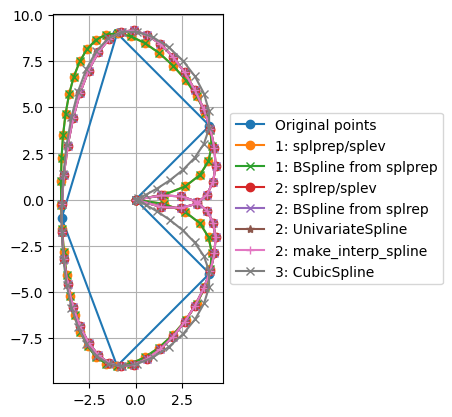

In [8]:
import numpy as np
from scipy.interpolate import *
import matplotlib.pyplot as plt

points = [[0, 0], [4, 4], [-1, 9], [-4, -1], [-1, -9], [4, -4], [0, 0]]
points = np.asarray(points)

n = 50 
ts = np.linspace(0, 1, len(points))
ts_new = np.linspace(0, 1, n)

(t0_0,c0_0,k0_0), u = splprep(points[:,[0]].T, s=0, k=3)
(t0_1,c0_1,k0_1), u = splprep(points[:,[1]].T, s=0, k=3)
p0_new = np.r_[np.asarray(splev(ts_new, (t0_0,c0_0,k0_0))),
               np.asarray(splev(ts_new, (t0_1,c0_1,k0_1))),
                ].T

# splprep/splev
(t1,c1,k1), u = splprep(points.T, s=0, k=3)
p1_new = splev(ts_new, (t1,c1,k1))
# BSpline from splprep
p2_new = BSpline(t1, np.asarray(c1).T, k=k1)(ts_new)
# splrep/splev (per dimension)
(t3_0,c3_0,k3_0) = splrep(ts, points[:,0].T, s=0, k=3)
(t3_1,c3_1,k3_1) = splrep(ts, points[:,1].T, s=0, k=3)
p3_new = np.c_[splev(ts_new, (t3_0,c3_0,k3_0)),
               splev(ts_new, (t3_1,c3_1,k3_1)),
               ]
# Bspline from splrep
p4_new = np.c_[BSpline(t3_0, np.asarray(c3_0), k=k3_0)(ts_new),
               BSpline(t3_1, np.asarray(c3_1), k=k3_1)(ts_new),
               ]
# UnivariateSpline
p5_new = np.c_[UnivariateSpline(ts, points[:,0], s=0, k=3)(ts_new),
               UnivariateSpline(ts, points[:,1], s=0, k=3)(ts_new),]
# make_interp_spline
p6_new = make_interp_spline(ts, points, k=3)(ts_new)
# CubicSpline
p7_new = CubicSpline(ts, points, bc_type="clamped")(ts_new)
# interp1d
p8_new = interp1d(ts, points.T, kind="cubic")(ts_new).T

fig, ax = plt.subplots()
ax.plot(*points.T, "o-", label="Original points")
ax.plot(*p1_new,   "o-", label="1: splprep/splev")
ax.plot(*p2_new.T, "x-", label="1: BSpline from splprep")
ax.plot(*p3_new.T, "o-", label="2: splrep/splev")
ax.plot(*p4_new.T, "x-", label="2: BSpline from splrep")
ax.plot(*p5_new.T, "*-", label="2: UnivariateSpline")
ax.plot(*p6_new.T, "+-", label="2: make_interp_spline")
ax.plot(*p7_new.T, "x-", label="3: CubicSpline")
#ax.plot(*p8_new.T, "k+-", label="3: interp1d")
#ax.plot(*p0_new.T, "k+-", label="3: CubicSpline")
ax.set_aspect("equal")
ax.grid("on")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()